# Simulating the Lorenz Attractor in Python

The Lorenz model, created by mathematician and meteorologist *Edward Lorenz*, is defined by **three ordinary differential equations** known as the Lorenz equations. It's notable for showcasing **chaotic behavior**:

$ \frac{dx}{dt} = \sigma(y - x) $

$\frac{dy}{dt} = x(\rho - z) - y $

$\frac{dz}{dt} = xy - \beta z $


The equations depict the dynamics of a uniformly warmed fluid layer with cooling from above in a two-dimensional setting.
They specifically capture the temporal evolution of three quantities:
* $x$ represents the **rate of convection**, 
* $y$ corresponds to the **horizontal temperature variation**,
* $z$ accounts for the **vertical temperature variation**.


For the sake of this video (and for simplicity) we will consider x, y and z as a position in 3D-Space.

$position = [x, y, z]$

### 1. Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

from scipy.integrate import odeint

### 2. Defining the Constants of lorenz Attractor & Variables

The constants are defined as follows:
* **Prandtl number $\sigma$**: Rate of heat transfer in the system.
* **Rayleigh number $\rho$**: Onset of convection and the overall behavior of the system.
* **Physical Dimension $\beta$**: Ratio of the width-to-height aspect ratio of the convecting cell in the system.

Lorenz used the values:
* $\sigma = 10$
* $\rho = 28$
* $\beta = 8/3$

In [2]:
sigma = 10
beta = 8/3
rho = 28

### 3. Solving the System Using odeint

The function  ```odeint``` is used to simulate the evolution of a dynamic system described by three ordinary differential equations. 

Inputs:
* Initial Condition of the system (```position_0```)
* A function describing the system of ode's $\frac{d\vec{S}}{dt} = A * \vec{S}$ (```system_of_odes```)
* The temproal domain in which we want to solve the system (```time_points```)
* Additional Arguments (```sigma, beta, rho```)

How does it work?
* We have $S_0$ at $t = t_0$ (Initial Condition) -> We want $S_1$ at $t = t_1$
* We get $S_1$ utilizing the numerical scheme for calculating derivatives:

$$\frac{S_1 - S_0}{\Delta t} = \frac{dS}{dt}$$
$$S_1 = S_0 + \Delta t \frac{dS}{dt}$$


* We have $\Delta t$ (interval of ```time_points```) we need $\frac{dS}{dt}$.
* We get $\frac{dS}{dt}$ by replacing $S_0$ in our system of odes:

$ \frac{dx}{dt} = \sigma(y_0 - x_0) $

$ \frac{dy}{dt} = x_0(\rho - z_0) - y_0 $

$ \frac{dz}{dt} = x_0 y_0 - \beta z_0 $

* Once we computed $S_1$, we repeat the process across all time points.

In [3]:
def system_of_odes(vector, t, sigma, beta, rho):
    x, y, z = vector

    d_vector = [
        sigma*(y - x),
        x*(rho - z) - y,
        x*y - beta*z
    ]
    return d_vector 


position_0 = [0.0, 1.0, 1.0] # Represents the position at t = 0
time_points = np.linspace(0, 40, 1001)

positions = odeint(system_of_odes, position_0, time_points, args=(sigma, beta, rho))
x_sol, y_sol, z_sol = positions[:, 0], positions[:, 1], positions[:, 2]


### 4. Plotting the Result we obtained

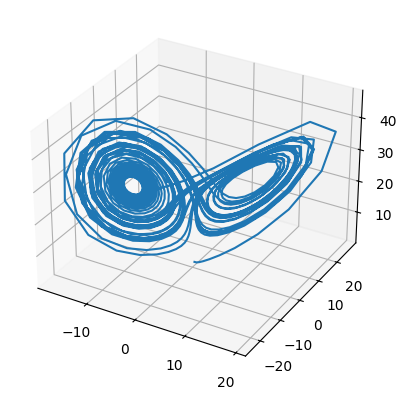

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.plot(x_sol, y_sol, z_sol)
plt.show()